# Chatbot
A chatbot is a text-based dialog system allowing the interaction with a computer system.
The system reacts on natural language text input by triggering actions and/or
replying with a text in natural language. Chatbots can be used in conjunction with an
avatar, i.e., they mimic a certain character and personality (e.g., ELIZA simulates a psychotherapist).
Powered by NLP, chatbots are the foundation of digital assistants (e.g.,
Google Assistant, Amazon’s Alexa). Furthermore, they are often used through messenger
apps (e.g., Facebook Messenger, WhatsApp), organizational tools, and websites.

This notebook demstrates a simple chatbot with the python library ``rasa``.
More about ``Rasa`` can be found here: [gitHub.RasaHQ](https://github.com/RasaHQ/rasa-demo).

Following code snippets are base on this [example](https://rasa.com/docs/rasa/jupyter-notebooks/).

### Install additional modules

In [ ]:
# Install rasa module

!pip3 install rasa

In [ ]:
# Due to the rasa installation, IPython must also be reinstalled
# NOTE: By the end of the insatallation, it might ask for restarting the runtime...
# In this case, just click the "RESTART RUNTIME" button.

!pip install -U ipython

## Load Resources

In [ ]:
import nest_asyncio

nest_asyncio.apply()
print("Event loop ready.")

Event loop ready.


In [ ]:
import rasa
from rasa.cli.scaffold import create_initial_project
import os

project = "test-project"
create_initial_project(project)

# Move into project directory and show files
os.chdir('/content/test-project/')
print(os.listdir("."))

['credentials.yml', 'data', 'tests', 'domain.yml', 'actions', 'config.yml', 'endpoints.yml']


## Train model

In [ ]:
# Prepare settings
config = "config.yml"
training_files = "data/"
domain = "domain.yml"
output = "models/"

# Train model
model_path = rasa.train(domain, config, [training_files], output)

The configuration for pipeline and policies was chosen automatically. It was written into the config file at 'config.yml'.
(0lqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqk(B
(0x(B Rasa Open Source reports anonymous usage telemetry to help improve the product (0x(B
(0x(B for all its users.                                                             (0x(B
(0x(B                                                                                (0x(B
(0x(B If you'd like to opt-out, you can use `rasa telemetry disable`.                (0x(B
(0x(B To learn more, check out https://rasa.com/docs/rasa/telemetry/telemetry.       (0x(B
(0mqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqj(B
Training NLU model...


/usr/local/lib/python3.7/dist-packages/rasa/utils/train_utils.py:535: UserWarning: model_confidence is set to `softmax`. It is recommended to try using `model_confidence=linear_norm` to make it easier to tune fallback thresholds.
  category=UserWarning,
Epochs: 100%|██████████| 100/100 [00:18<00:00,  5.35it/s, t_loss=1.49, i_acc=1]


NLU model training completed.
Training Core model...


Processed trackers: 100%|██████████| 3/3 [00:00<00:00, 53.68it/s, # actions=12]
Processed actions: 12it [00:00, 516.00it/s, # examples=12]
Processed trackers: 100%|██████████| 2/2 [00:00<00:00, 108.97it/s, # actions=5]
Processed actions: 5it [00:00, 599.79it/s, # examples=4]
Processed trackers: 100%|██████████| 5/5 [00:00<00:00, 506.95it/s]


Core model training completed.
Your Rasa model is trained and saved at '/content/test-project/models/20210326-095729.tar.gz'.


In [ ]:
# Save the model name

os.chdir('models/')
model_name = os.listdir()
os.chdir('../../')

## Launch chatbot

In [ ]:
# Start a chatbot

from rasa.jupyter import chat

endpoints = "endpoints.yml"
model_path = "test-project/models/" + model_name[0]

chat(model_path, endpoints)

/usr/local/lib/python3.7/dist-packages/rasa/utils/train_utils.py:535: UserWarning: model_confidence is set to `softmax`. It is recommended to try using `model_confidence=linear_norm` to make it easier to tune fallback thresholds.
  category=UserWarning,


Your bot is ready to talk! Type your messages here or send '/stop'.
Hi
Hey! How are you?
Fine, thanks
Bye
wait
Bye
What's your name
Great, carry on!
Ok, let's take some time to talk
I am a bot, powered by Rasa.
I know..
Bye
/Stop


/usr/local/lib/python3.7/dist-packages/rasa/shared/utils/io.py:96: UserWarning: Interpreter parsed an intent 'Stop' which is not defined in the domain. Please make sure all intents are listed in the domain.
  More info at https://rasa.com/docs/rasa/domain


Great, carry on!
/stop


## Evaluate the model against test data

In [ ]:
import rasa.shared.data as data
#
nlu_data_directory = data.get_data_files('/content/test-project', rasa.shared.data.is_nlu_file)
stories_directory = data.get_data_files('/content/test-project', rasa.shared.data.is_story_file)
print(stories_directory, nlu_data_directory)

['/content/test-project/data/rules.yml', '/content/test-project/data/stories.yml', '/content/test-project/tests/test_stories.yml'] ['/content/test-project/data/nlu.yml', '/content/test-project/domain.yml']


/usr/local/lib/python3.7/dist-packages/rasa/utils/train_utils.py:535: UserWarning: model_confidence is set to `softmax`. It is recommended to try using `model_confidence=linear_norm` to make it easier to tune fallback thresholds.
  category=UserWarning,


/usr/local/lib/python3.7/dist-packages/rasa/shared/utils/io.py:96: UserWarning: Issue found in '/content/test-project/data/stories.yml': 
Found intent 'greet' in stories which is not part of the domain.
  More info at https://rasa.com/docs/rasa/stories
/usr/local/lib/python3.7/dist-packages/rasa/shared/utils/io.py:96: UserWarning: Issue found in '/content/test-project/data/stories.yml': 
Found intent 'mood_great' in stories which is not part of the domain.
  More info at https://rasa.com/docs/rasa/stories
/usr/local/lib/python3.7/dist-packages/rasa/shared/utils/io.py:96: UserWarning: Issue found in '/content/test-project/data/stories.yml': 
Found intent 'mood_unhappy' in stories which is not part of the domain.
  More info at https://rasa.com/docs/rasa/stories
/usr/local/lib/python3.7/dist-packages/rasa/shared/utils/io.py:96: UserWarning: Issue found in '/content/test-project/data/stories.yml': 
Found intent 'affirm' in stories which is not part of the domain.
  More info at https://ra

/usr/local/lib/python3.7/dist-packages/rasa/utils/train_utils.py:535: UserWarning: model_confidence is set to `softmax`. It is recommended to try using `model_confidence=linear_norm` to make it easier to tune fallback thresholds.
  category=UserWarning,
100%|██████████| 69/69 [00:01<00:00, 67.97it/s]
/usr/local/lib/python3.7/dist-packages/rasa/utils/plotting.py:194: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  axes[1].set(yticks=yticks, xlim=(0, max_xlims[1]), ylim=(min_ylim, max_ylim))


Done testing.


<Figure size 1440x1440 with 0 Axes>

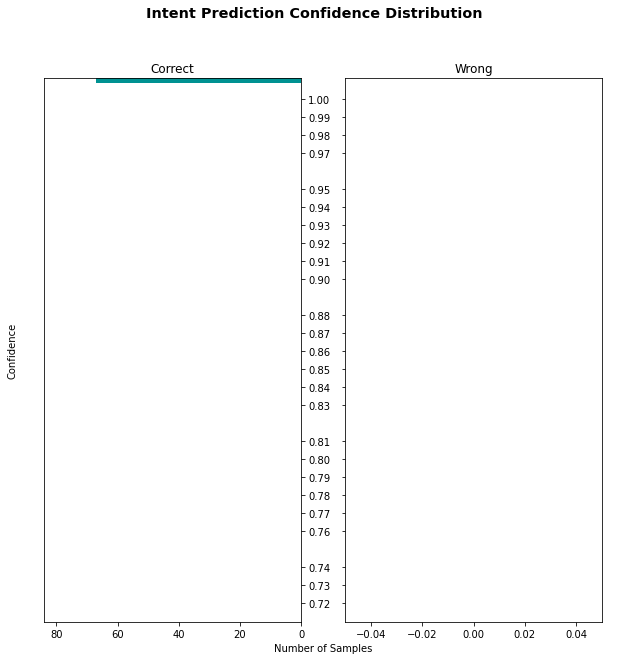

In [ ]:
rasa.test(model_path, stories_directory[1], nlu_data_directory[0])
print("Done testing.")

In [ ]:
if os.path.isfile("errors.json"):
    print("NLU Errors:")
    print(open("errors.json").read())
else:
    print("No NLU errors.")

if os.path.isdir("results"):
      print("\n")
      print("Core Errors:")
      print(open("results/failed_test_stories.yml").read())

No NLU errors.


Core Errors:
# None of the test stories failed - all good!


Copyright © 2021 IUBH Internationale Hochschule